## Citations

Rollings, A. (2020). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python, hiive extended remix. https://github.com/hiive/mlrose. Accessed: Sept 28, 2020

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: Sept 28, 2020

(Timer) https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python

In [36]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit

from sklearn import tree, svm, datasets, metrics, preprocessing
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, learning_curve, cross_val_score, validation_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Knapsack

In [37]:
# define fitness

weights = [6, 6, 6, 2, 2, 8, 10, 9, 1, 7]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

In [38]:
problem = mlrose.DiscreteOpt(length = len(weights), fitness_fn = fitness, maximize = True)
max_iters = 1000
max_attempts = 200

### Randomized Hill Climbing

In [39]:
start = timeit.default_timer()
best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_attempts = max_attempts, max_iters=max_iters, restarts=3, curve=True, init_state = None, random_state=1)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 0.03611879099980797s


### Simulated Annealing

In [40]:
start = timeit.default_timer()
best_state, best_fitness, sa_curve = mlrose.simulated_annealing(problem=problem, max_attempts=100, max_iters=max_iters, curve=True, random_state=None)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 0.009909244000027684s


### Genetic Algorithm

In [41]:
start = timeit.default_timer()
best_state, best_fitness, ga_curve = mlrose.genetic_alg(problem=problem, pop_size=len(weights), mutation_prob=0.3, max_attempts=100, max_iters=max_iters, curve=True, random_state=None)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 0.10433796200004508s


### MIMIC

In [42]:
start = timeit.default_timer()
best_state, best_fitness, mimic_curve = mlrose.mimic(problem, pop_size = 600, keep_pct = 0.2, max_attempts = max_attempts, 
                                                     max_iters = max_iters,  curve = True, 
                                                     random_state = 1)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 11.818992908999917s


In [43]:
plot_dict = dict(x=np.arange(1,max_iters+1),
                 Random_Hill = rhc_curve,
                 Sim_Anneal = sa_curve,
                 Genetic_Alg = ga_curve,
                 MIMIC = mimic_curve)

In [44]:
df = pd.DataFrame.from_dict(plot_dict, orient='index')
df = df.transpose()
df.head()

,x,Random_Hill,Sim_Anneal,Genetic_Alg,MIMIC
0,1.0,0.0,37.0,43.0,45.0
1,2.0,0.0,37.0,43.0,45.0
2,3.0,30.0,37.0,43.0,45.0
3,4.0,30.0,37.0,43.0,45.0
4,5.0,30.0,37.0,43.0,45.0


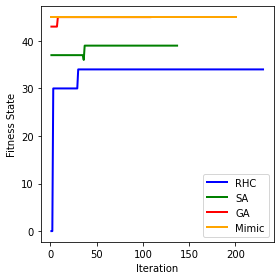

In [45]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot('x', 'Random_Hill', data=df, marker='', c='Blue', markeredgecolor='w', linewidth=2, label='RHC')
ax.plot('x', 'Sim_Anneal', data=df, marker='', c='Green', markeredgecolor='w', linewidth=2, label='SA')
ax.plot('x', 'Genetic_Alg', data=df, marker='', c='Red', markeredgecolor='w', linewidth=2, label='GA')
ax.plot('x', 'MIMIC', data=df, marker='', c='Orange', markeredgecolor='w', linewidth=2, label='Mimic')
ax.set_xlabel('Iteration')
ax.set_ylabel('Fitness State')
ax.legend()

fig.tight_layout()